# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import datetime as dt
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rinatabitov/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [6]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy',
                                      )
btc_articles

{'status': 'ok',
 'totalResults': 8338,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Jeff Somers',
   'title': 'Is the Crypto Bubble Going to Burst?',
   'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
   'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg',
   'publishedAt': '2022-02-09T16:00:00Z',
   'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]'},
  {'sou

In [9]:
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

btc_headlines['totalResults']

8338

In [10]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    from_param=dt.datetime.today() - dt.timedelta(days=1),
    to=dt.datetime.today(),
    page_size = 100,
    sort_by="publishedAt" #latest news articles
)

eth_headlines['totalResults']

95

In [11]:
# Create the Bitcoin sentiment scores DataFrame
def sentiment_df(articles):
    BTC_sentiment = []
    for article in articles:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            BTC_sentiment.append({
                "date": date,
                "text": text,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })
            
        except AttributeError:
            pass
        
    # Create DataFrame
    df = pd.DataFrame(BTC_sentiment)
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df

In [12]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_scores = sentiment_df(eth_headlines["articles"])
eth_sentiment_scores.head()

,date,text,compound,positive,negative,neutral
0,2022-02-14,The recent guidance provided by the US Treasur...,0.1027,0.041,0.000,0.959
1,2022-02-14,Bitcoin saw a major price rally at the start o...,-0.2023,0.000,0.048,0.952
2,2022-02-14,".\r\nOK, let me explain. That string of emojis...",0.4466,0.073,0.000,0.927
3,2022-02-14,"????????????.\r\nOK, let me explain. That stri...",0.5984,0.098,0.000,0.902
4,2022-02-14,SoFi Technologies CEO Anthony Noto talked abou...,-0.1027,0.053,0.066,0.881


In [13]:
# Describe the Bitcoin Sentiment
btc_sentiment_scores = sentiment_df(btc_headlines["articles"])
btc_sentiment_scores.head()

,date,text,compound,positive,negative,neutral
0,2022-02-09,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
3,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
4,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000


In [14]:
# Describe the Ethereum Sentiment
btc_desc_senti = btc_sentiment_scores.describe()
btc_desc_senti

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.043300,0.061950,0.044700,0.893350
std,0.458509,0.060617,0.053913,0.056841
min,-0.709600,0.000000,0.000000,0.765000
25%,-0.426225,0.000000,0.000000,0.862500
50%,0.127550,0.054500,0.000000,0.910500
75%,0.366350,0.109750,0.088000,0.928250
max,0.778300,0.185000,0.169000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopwords = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
custom_stopwords = {
    'char',
    'fi',
    'ha',
    'sa',
    'wa',
}
stopwords = stopwords | custom_stopwords

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in stopwords]
    
    

    return tokens

In [18]:
# Create a new tokens column for Bitcoin
btc_sentiment_scores['tokens'] = btc_sentiment_scores['text'].apply(lambda x: tokenizer(x))
btc_sentiment_scores.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-09,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[even, arent, paying, attention, bitcoin, cryp..."
1,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
2,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
3,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
4,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."


In [19]:
# Create a new tokens column for Ethereum
eth_sentiment_scores['tokens'] = eth_sentiment_scores['text'].apply(lambda x: tokenizer(x))
eth_sentiment_scores.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-14,The recent guidance provided by the US Treasur...,0.1027,0.041,0.000,0.959,"[recent, guidance, provided, us, treasury, dep..."
1,2022-02-14,Bitcoin saw a major price rally at the start o...,-0.2023,0.000,0.048,0.952,"[bitcoin, saw, major, price, rally, start, feb..."
2,2022-02-14,".\r\nOK, let me explain. That string of emojis...",0.4466,0.073,0.000,0.927,"[ok, let, explain, string, emojis, url, entere..."
3,2022-02-14,"????????????.\r\nOK, let me explain. That stri...",0.5984,0.098,0.000,0.902,"[ok, let, explain, string, emojis, url, entere..."
4,2022-02-14,SoFi Technologies CEO Anthony Noto talked abou...,-0.1027,0.053,0.066,0.881,"[sofi, technologies, ceo, anthony, noto, talke..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
bigrams_btc = ngrams(
    tokenizer(' '.join(btc_sentiment_scores['text'])),
    n=2,
)
list(bigrams_btc)[:5]

[('even', 'arent'),
 ('arent', 'paying'),
 ('paying', 'attention'),
 ('attention', 'bitcoin'),
 ('bitcoin', 'cryptocurrencies')]

In [22]:
# Generate the Ethereum N-grams where N=2
bigrams_eth = ngrams(
    tokenizer(' '.join(eth_sentiment_scores['text'])),
    n=2,
)
list(bigrams_eth)[:5]

[('recent', 'guidance'),
 ('guidance', 'provided'),
 ('provided', 'us'),
 ('us', 'treasury'),
 ('treasury', 'department')]

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
token_count(
    w
    for article_words in btc_sentiment_scores['tokens'].to_list()
    for w in article_words
)

[('bitcoin', 16),
 ('company', 6),
 ('open', 5),
 ('mining', 5),
 ('el', 4),
 ('building', 4),
 ('new', 4),
 ('said', 4),
 ('last', 3),
 ('salvador', 3)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
token_count(
    w
    for article_words in eth_sentiment_scores['tokens'].to_list()
    for w in article_words
)

[('crypto', 19),
 ('bitcoin', 16),
 ('company', 15),
 ('digital', 15),
 ('cryptocurrency', 13),
 ('us', 12),
 ('new', 11),
 ('blockchain', 11),
 ('february', 10),
 ('week', 10)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

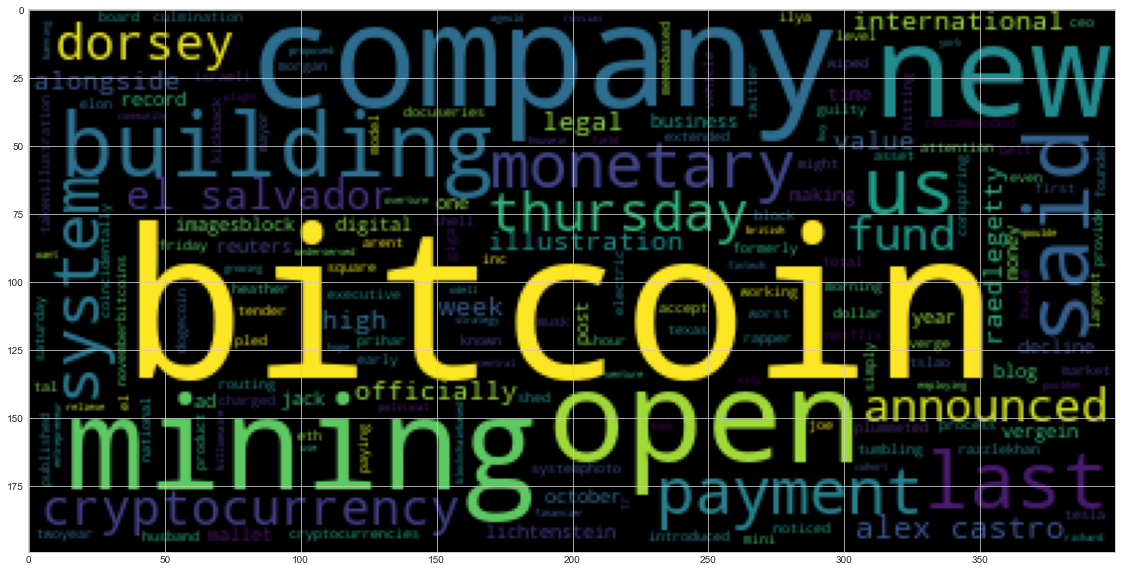

In [27]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(
    ' '.join(tokenizer(
        ' '.join(btc_sentiment_scores['text']))
    )
)
plt.imshow(wc_btc);

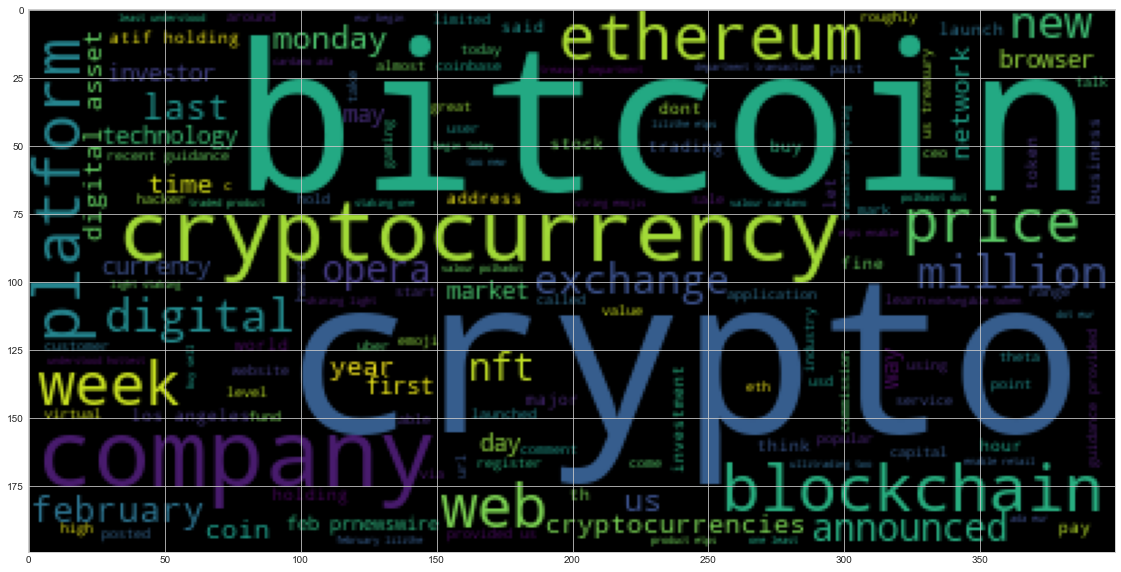

In [28]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(
    ' '.join(tokenizer(
        ' '.join(eth_sentiment_scores['text']))
    )
)
plt.imshow(wc_eth);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 2.8 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [121]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 682 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/rinatabitov/opt/anaconda3/lib/python3.8/site-packages/en_core_web_sm -->
/Users/rinatabitov/opt/anaconda3/lib/python3.8/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [36]:
# Concatenate all of the Bitcoin text together
btc_doc = ' '.join(btc_sentiment_scores['text'])

In [37]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_doc)

# Add a title to the document
btc_doc.user_data["title"] = "BTC NER"

In [39]:
# Render the visualization
displacy.render(btc_doc, style='ent', jupyter=True)

In [41]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
last week DATE
3 MONEY
El Salvador GPE
Bitcoin GPE
US NORP
2021 DATE
Alex Castro PERSON
The Verge

 

  WORK_OF_ART
El PERSON
Bitcoin GPE
Joe Raedle PERSON
Square FAC
Bitcoin GPE
Israeli NORP
Tal Prihar PERSON
Bitcoin GPE
Alex Castro PERSON
The Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
The Verge ORG
the early hours of Thursday morning TIME
Netflix
  PERSON
Heather "Razzlekhan" Morgan PERSON
Ilya Lichtenstein ORG
this week DATE
Bitcoin GPE
Saturday DATE
more than 50% PERCENT
November DATE
Bitcoin GPE
more than $ MONEY
Jack Dorsey PERSON
Twitter ORG
first ORDINAL
October last year DATE
Tesla Inc ORG
Elon Musk ORG
Friday DATE
age-old DATE
Fintech ORG
New York City GPE
British NORP
Richard ODell Poulden PERSON
Bitcoin GPE
October DATE
Poulde PERSON
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Bitcoin GPE
Lichtensteins PERSON
Margaret Lynaugh PERSON
Bitcoin GPE
El Salvador GPE
US GPE
The International M

In [42]:
btc_ent_df = pd.DataFrame(
    [
        (ent.text, ent.label_)
        for ent in btc_doc.ents
    ],
    columns=['text', 'label']
)
btc_ent_df.head()

,text,label
0,Bitcoin,GPE
1,last week,DATE
2,3,MONEY
3,El Salvador,GPE
4,Bitcoin,GPE


---

### Ethereum NER

In [43]:
# Concatenate all of the Ethereum text together
eth_doc = ' '.join(eth_sentiment_scores['text'])

In [44]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_doc)

# Add a title to the document
eth_doc.user_data["title"] = "ETH NER"

In [45]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [46]:
# List all Entities
btc_ent_df = pd.DataFrame(
    [
        (ent.text, ent.label_)
        for ent in eth_doc.ents
    ],
    columns=['text', 'label']
)
btc_ent_df.head()

,text,label
0,the US Treasury Department,ORG
1,Bitcoin,GPE
2,the start of February,DATE
3,six-month,DATE
4,bitcoin,GPE


---